In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plot

In [2]:
data = pd.read_csv('data\la-haute-borne-data-2017-2020.csv',delimiter = ";")
selected_columns = data[["Date_time","DCs_avg"]]
new_df = selected_columns.copy()

In [3]:
# Set datetime
from datetime import datetime

new_df['Date_time'] = pd.to_datetime(data['Date_time'])
new_df['Date_time'] = pd.to_datetime(new_df['Date_time'], utc=True)

In [4]:
# Set index
new_df.set_index('Date_time', inplace = True)


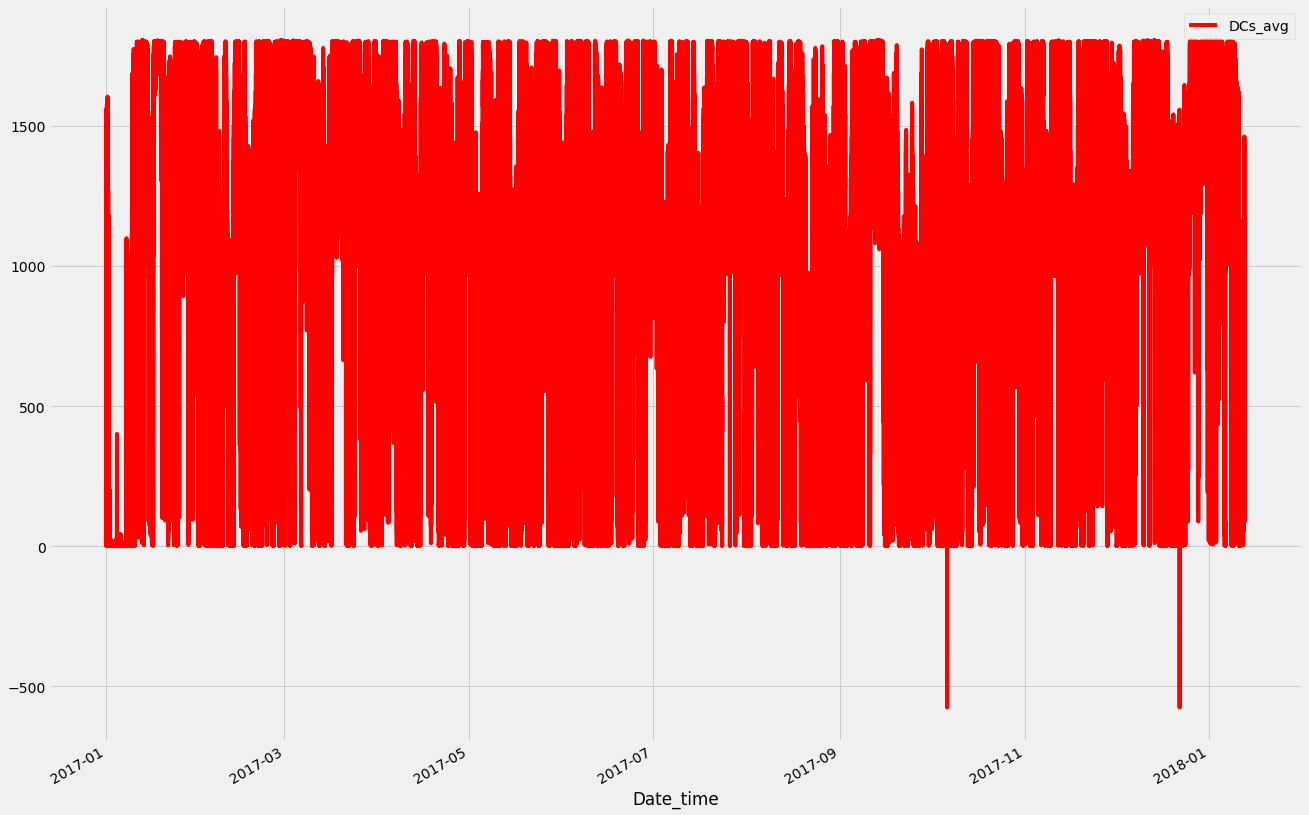

In [5]:
#plot

plot.style.use('fivethirtyeight')
new_df.plot(figsize=(20,15), color='red')
plot.show()

In [6]:
#ARIMA model:

import statsmodels
import statsmodels.api as sm


In [7]:
# Fit an MA(1) model to the first simulated data
model = sm.tsa.arima.ARIMA(new_df, order=(1,1,2))
res = model.fit()


# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print(res.params)

C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so w

                               SARIMAX Results                                
Dep. Variable:                DCs_avg   No. Observations:               217588
Model:                 ARIMA(1, 1, 2)   Log Likelihood            -1681421.370
Date:                Mon, 07 Mar 2022   AIC                        3362850.740
Time:                        10:48:30   BIC                        3362891.901
Sample:                             0   HQIC                       3362862.811
                             - 217588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9881      0.007   -134.233      0.000      -1.003      -0.974
ma.L1          0.0361      0.008      4.700      0.000       0.021       0.051
ma.L2         -0.9385      0.007   -127.613      0.0

In [11]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(new_df,order=(1,1,1)) 
# fit model
model_fit = model.fit()  
print(model_fit.summary())

res.plot_predict(start='2017',end='2025')
plt.legend(fontsize=8)
plt.show();

C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Johannes.Gaus\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so w

                               SARIMAX Results                                
Dep. Variable:                DCs_avg   No. Observations:               217588
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1679861.387
Date:                Mon, 07 Mar 2022   AIC                        3359728.773
Time:                        10:57:01   BIC                        3359759.645
Sample:                             0   HQIC                       3359737.826
                             - 217588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1319      0.002    -57.924      0.000      -0.136      -0.127
ma.L1         -0.9279      0.001  -1101.177      0.000      -0.930      -0.926
sigma2      3.419e+05   1232.128    277.451      0.0

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'